Fatemeh Amanian

Train neural network models (at least two different networks for each dataset, i.e., no. layers, no. neurons, activation, ...) in either Tensorflow or Pytorch to perform classification on the following datasets:

Cifar-10

In [1]:
import sys
from matplotlib import pyplot
import numpy as np
import PIL

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

Download the data:

In [2]:
from keras.datasets import cifar10
x = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
!find / -type f -name "data_batch_1"

/root/.keras/datasets/cifar-10-batches-py/data_batch_1


In [4]:
!mkdir /content/data
!mkdir /content/data/cifar10
!mv  -v /root/.keras/datasets/cifar-10-batches-py/* /content/data/cifar10

renamed '/root/.keras/datasets/cifar-10-batches-py/batches.meta' -> '/content/data/cifar10/batches.meta'
renamed '/root/.keras/datasets/cifar-10-batches-py/data_batch_1' -> '/content/data/cifar10/data_batch_1'
renamed '/root/.keras/datasets/cifar-10-batches-py/data_batch_2' -> '/content/data/cifar10/data_batch_2'
renamed '/root/.keras/datasets/cifar-10-batches-py/data_batch_3' -> '/content/data/cifar10/data_batch_3'
renamed '/root/.keras/datasets/cifar-10-batches-py/data_batch_4' -> '/content/data/cifar10/data_batch_4'
renamed '/root/.keras/datasets/cifar-10-batches-py/data_batch_5' -> '/content/data/cifar10/data_batch_5'
renamed '/root/.keras/datasets/cifar-10-batches-py/readme.html' -> '/content/data/cifar10/readme.html'
renamed '/root/.keras/datasets/cifar-10-batches-py/test_batch' -> '/content/data/cifar10/test_batch'


Import data:

In [5]:
path='./data/cifar10'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

train_batch =[]
for i in range(5):
    train_batch.append(unpickle(path + "/data_batch_" + str(i+1) ))
test_batch = unpickle(path + "/test_batch")


train_data = []
train_labels = []
for batch in train_batch:
    train_data.append(np.array(batch[b'data']))
    train_labels.extend(np.array(batch[b'labels']))
train_data = np.stack(train_data, axis=0)
train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(train_data.shape)

print(len(train_labels))

test_labels = []
test_data = np.array(test_batch[b'data'])
test_labels.extend(np.array(test_batch[b'labels']))

test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(test_data.shape)
print(len(test_labels))

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
10000


In [6]:
classes = [ "airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

Normalization:

In [7]:
train_set = ((train_data/255.0), np.asarray(train_labels))
test_set = (test_data/255.0, np.asarray(test_labels))
# (x_train-x_train.mean())/x_train.std()
print(train_set[0].shape, train_set[1].shape)
print(test_set[0].shape, test_set[1].shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


frog


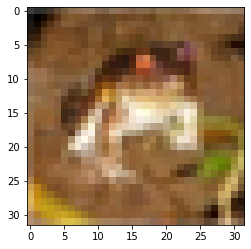

In [8]:
pyplot.imshow(train_set[0][0])
print(classes[train_set[1][0]])

Define a Convolutional Neural Network

In [9]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

Define a Loss function and optimizer

In [10]:
# compile model
opt1 = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize

In [11]:
epochs=30
# fit model
history1 = model1.fit(train_set[0], train_set[1], epochs=epochs, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc1 = model1.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc1 * 100.0))

Epoch 1/30
782/782 [==============================] - 4s 5ms/step - loss: 1.7812 - accuracy: 0.3664 - val_loss: 1.5247 - val_accuracy: 0.4554
Epoch 2/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4445 - accuracy: 0.4896 - val_loss: 1.3430 - val_accuracy: 0.5232
Epoch 3/30
782/782 [==============================] - 3s 4ms/step - loss: 1.2850 - accuracy: 0.5490 - val_loss: 1.2507 - val_accuracy: 0.5614
Epoch 4/30
782/782 [==============================] - 3s 4ms/step - loss: 1.1748 - accuracy: 0.5905 - val_loss: 1.1620 - val_accuracy: 0.5914
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 1.0847 - accuracy: 0.6241 - val_loss: 1.0931 - val_accuracy: 0.6145
Epoch 6/30
782/782 [==============================] - 3s 4ms/step - loss: 1.0140 - accuracy: 0.6480 - val_loss: 1.0805 - val_accuracy: 0.6211
Epoch 7/30
782/782 [==============================] - 3s 4ms/step - loss: 0.9564 - accuracy: 0.6681 - val_loss: 1.0249 - val_accuracy: 0.6438
Epoch 

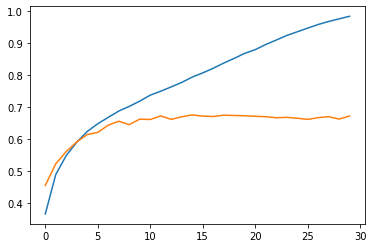

In [13]:
pyplot.plot(range(0,epochs), history1.history['accuracy'])
pyplot.plot(range(0,epochs), history1.history['val_accuracy'])

Model 2:

In [20]:
from tensorflow.keras.layers import Dropout
model2 = Sequential()
model2.add(Conv2D(32, (6, 6), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(198, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))
# compile model
opt2 = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
epochs2=30
# fit model
history2 = model2.fit(train_set[0], train_set[1], epochs=30, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc2 = model2.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc2 * 100.0))

Epoch 1/30
782/782 [==============================] - 6s 7ms/step - loss: 1.9440 - accuracy: 0.2874 - val_loss: 1.6265 - val_accuracy: 0.4175
Epoch 2/30
782/782 [==============================] - 5s 7ms/step - loss: 1.6399 - accuracy: 0.4070 - val_loss: 1.4599 - val_accuracy: 0.4812
Epoch 3/30
782/782 [==============================] - 5s 7ms/step - loss: 1.5077 - accuracy: 0.4507 - val_loss: 1.3518 - val_accuracy: 0.5161
Epoch 4/30
782/782 [==============================] - 5s 7ms/step - loss: 1.4299 - accuracy: 0.4829 - val_loss: 1.3032 - val_accuracy: 0.5309
Epoch 5/30
782/782 [==============================] - 5s 7ms/step - loss: 1.3660 - accuracy: 0.5077 - val_loss: 1.2526 - val_accuracy: 0.5588
Epoch 6/30
782/782 [==============================] - 5s 7ms/step - loss: 1.3115 - accuracy: 0.5297 - val_loss: 1.2078 - val_accuracy: 0.5733
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 1.2641 - accuracy: 0.5470 - val_loss: 1.1644 - val_accuracy: 0.5857
Epoch 

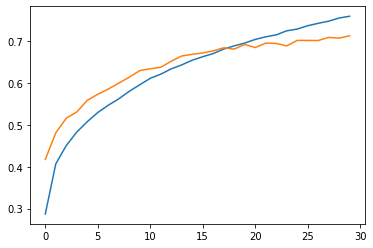

In [23]:
pyplot.plot(range(0,epochs2), history2.history['accuracy'])
pyplot.plot(range(0,epochs2), history2.history['val_accuracy'])

Looks like adding dropouts decreased the distance between training and test accuracy. It's probably because the model don't overfit to the training data.